In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    # sigmoid function for logestic regression
    return 1.0/(1.0+np.exp(-z))

In [3]:
def quality(w,b,data):
    #for testing data
    # given inputs are discriminating value,projection line vector,test data  
    #data=data.reset_index()
    Aclass=data["f"].tolist()                                                       #actual class data for final verification
    x=(data.drop(columns=['f']))                                      #data manuplation for logestic regression
                              
    aftestdata=sigmoid(np.dot(w,x.T)+b)                      # data after prediction
    a=[0 if x<0.5 else 1 for x in aftestdata]           #our classification into fake or not fake bank notes
    cor,tp,fp,fn,tn=0,0,0,0,0                                        # manging count of correct classifications
    
    for i in range(len(a)):
        if Aclass[i]==a[i]:
            cor=cor+1
        if Aclass[i]==1 and a[i]==1:
            tp=tp+1
        elif Aclass[i]==0 and a[i]==1:
            fp=fp+1
        elif Aclass[i]==1 and a[i]==0:
            fn=fn+1
        elif Aclass[i]==0 and a[i]==0:
            tn=tn+1
    
    
    if tp==0 :
        fscore=0
    else:
        prec=tp/(tp+fp)
        recall=tp/(tp+fn)
        fscore=2*((prec*recall)/(prec+recall))
    
    return (cor/len(a))*100,fscore                                  # returning %  of data classified correct and f score 

In [4]:
def logreg(w,b,train,epoch,eta):
    #logestic regression without regularistion
    y=train['f']
    x=train.drop(columns=['f'])
    
    m=len(y)
    old_cost=4             # is set to four  because maximum diifernce in cost is 2
    err=[]
    for i in range(epoch):
        
        ypred=sigmoid(np.dot(w,x.T)+b)
        
        
        cost=(sum(((y*np.log(ypred))+((1-y)*np.log((1-ypred))))))*(-1/m)
        
        if cost>old_cost:
            eta=eta/1.5
            
        w_grad=(1/m)*(np.dot((ypred-y),x))
        b_grad=(1/m)*(sum((ypred-y)))
   
        old_cost=cost
    
        w=w-(eta*w_grad)
        b=b-(eta*b_grad)
        if i%10==0:
            err.append(cost)
    y=err
    x=[i*10 for i in range(len(err))]
    plt.plot(x,y)
    plt.xlabel("iterations",size=12)
    plt.ylabel("error",size=12)
    plt.show()  
    print(cost)
    return w,b

In [5]:
data=pd.read_csv("money.csv")

data=(data-data.min())/(data.max()-data.min()) #scaling of data to a range of 0-1 (normalization) 

#random state is a seed value.for a particular seed value gives same distribution always
train=data.sample(frac=0.8,random_state=200) 
test=data.drop(train.index) 
#print(train)
#print(test)

In [6]:
eta=100
epoch=3000
w=np.array([1,2,3,4])
#w=np.random.random(4)
#w=np.random.randn(4)
b=1

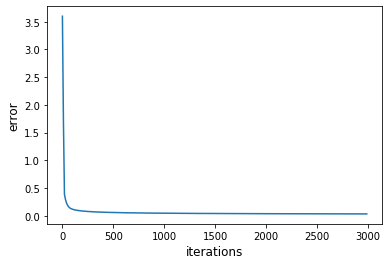

0.03401931941911702
[-31.45347132 -30.15514933 -32.73909891   1.36191249] 40.76843884066982


In [7]:

w,b=logreg(w,b,train,epoch,eta)
    
print(w,b)

In [8]:
acc,fsc=quality(w,b,test)
print(acc,fsc)

97.8102189781022 0.9752066115702478


In [9]:
#[0.0025116250011651183, 0.0024030383924067084, 0.0007485528578388942, 0.0021384347347258373] 1.0031658631950182
#[1.0041019754148546, 2.004129491731636, 3.0016063126691894, 4.004122073846572] 1.0061200349026265
#[1.4103012550369893, 2.413101093399932, 3.1606769058910555, 4.412314198247626] 1.6122252300398145
#[-22.523769648129207, -19.19422134153271, -21.375068344633373, 2.099529088831093] 26.858836187616014
#[-42.17957590714859, -41.74152792351742, -45.15427534135392, 0.49428432348228296] 56.1949064193798
#98.90510948905109 0.9874476987447698 #10000 epochs

#[-78.89244150767122, -78.28378164924807, -85.57670966274415, -2.7223050800518154] 107.23712091947378
#98.90510948905109 0.9873417721518987 #10000000 epochs

#[-31.45347132496906, -30.15514933437314, -32.739098910447865, 1.3619124919260344] 40.76843884066986
#97.8102189781022 0.9752066115702478 # 3000 epochs
